In [1]:
import snscrape.modules.twitter as sntwitter
import pandas as pd
import csv

import contractions
import nltk
from nltk.text import Text
from nltk.corpus import PlaintextCorpusReader
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords, wordnet
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords

# import spacy

import re 

In [2]:
df = pd.read_csv('sg_phases.csv')

In [3]:
df

,url,date,rawContent,renderedContent,id,user,replyCount,retweetCount,likeCount,quoteCount,...,inReplyToTweetId,inReplyToUser,mentionedUsers,coordinates,place,hashtags,cashtags,card,viewCount,vibe
0,https://twitter.com/adamfranc1s/status/1333560...,2020-11-30 23:55:59+00:00,already last month year day fly fast still stu...,already last month year day fly fast still stu...,1333560438454304768,https://twitter.com/adamfranc1s,0,0,0,0,...,NaN,NaN,NaN,"Coordinates(longitude=103.605441448115, latitu...","Place(id='0b37664066a8962a', fullName='West Re...",NaN,NaN,NaN,NaN,NaN
1,https://twitter.com/mfosgp/status/133355274084...,2020-11-30 23:25:24+00:00,realdonaldtrump covid rally noted history book...,realdonaldtrump covid rally noted history book...,1333552740841136128,https://twitter.com/mfosgp,0,0,0,0,...,1.333246e+18,https://twitter.com/realDonaldTrump,"[User(username='realDonaldTrump', id=25073877,...","Coordinates(longitude=103.749959507073, latitu...","Place(id='58a4c3a0d54e1400', fullName='Central...",NaN,NaN,NaN,NaN,NaN
2,https://twitter.com/hafanzeee/status/133344797...,2020-11-30 16:29:05+00:00,later touch wood someone kena panic bodoh,later touch wood someone kena panic bodoh,1333447971497603074,https://twitter.com/hafanzeee,0,0,0,0,...,NaN,NaN,NaN,"Coordinates(longitude=103.749959507073, latitu...","Place(id='58a4c3a0d54e1400', fullName='Central...",['bodoh'],NaN,NaN,NaN,NaN
3,https://twitter.com/JosephJohnAdam1/status/133...,2020-11-30 13:39:29+00:00,precisely america decline everyone around glob...,precisely america decline everyone around glob...,1333405288947273728,https://twitter.com/JosephJohnAdam1,0,0,0,0,...,NaN,NaN,"[User(username='Mediaite', id=29465136, displa...","Coordinates(longitude=103.89216999988, latitud...","Place(id='6635b2fcebd13c64', fullName='East Re...",NaN,NaN,SummaryCard(title='Watch Steve Doocy Try Valia...,NaN,NaN
4,https://twitter.com/itsfixi/status/13334047783...,2020-11-30 13:37:27+00:00,dia kena quarantine pasal covid hopefully takd...,dia kena quarantine pasal covid hopefully takd...,1333404778349490178,https://twitter.com/itsfixi,0,0,5,0,...,NaN,NaN,NaN,"Coordinates(longitude=103.543741, latitude=1.3...","Place(id='72d5ecacd2d3a055', fullName='Pulai, ...",NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1741,https://twitter.com/SajidTweetsBD/status/12717...,2020-06-13 08:40:28+00:00,breaking coronavirus update bangladesh last ho...,breaking coronavirus update bangladesh last ho...,1271724105264361472,https://twitter.com/SajidTweetsBD,0,0,0,0,...,NaN,NaN,NaN,"Coordinates(longitude=103.696411999967, latitu...","Place(id='14d9532bd696d8cb', fullName='North R...",NaN,NaN,NaN,NaN,NaN
1742,https://twitter.com/Rys5a_Gonzalez/status/1271...,2020-06-11 17:20:37+00:00,thankfully dad got discharged today thou reall...,thankfully dad got discharged today thou reall...,1271130229835132929,https://twitter.com/Rys5a_Gonzalez,0,0,0,0,...,NaN,NaN,NaN,"Coordinates(longitude=103.696411999967, latitu...","Place(id='14d9532bd696d8cb', fullName='North R...",NaN,NaN,NaN,NaN,NaN
1743,https://twitter.com/msmsaifullah/status/127060...,2020-06-10 06:43:05+00:00,raneunn ah explains present dispensation tn wa...,raneunn ah explains present dispensation tn wa...,1270607400194592773,https://twitter.com/msmsaifullah,1,0,0,0,...,1.270607e+18,https://twitter.com/RangaEunny,NaN,"Coordinates(longitude=103.749959507073, latitu...","Place(id='58a4c3a0d54e1400', fullName='Central...",NaN,NaN,NaN,NaN,NaN
1744,https://twitter.com/whywendywrites/status/1267...,2020-06-01 12:37:15+00:00,snapshot circuit breaker singapore world becom...,snapshot circuit breaker singapore world becom...,1267435038465024001,https://twitter.com/whywendywrites,0,0,0,0,...,NaN,NaN,NaN,"Coordinates(longitude=103.8627359, latitude=1....","Place(id='58a4c3a0d54e1400', fullName='Central...",NaN,NaN,NaN,NaN,NaN


In [4]:
df.isna().sum()

url                    0
date                   0
rawContent             1
renderedContent        1
id                     0
user                   0
replyCount             0
retweetCount           0
likeCount              0
quoteCount             0
conversationId         0
lang                   0
source                 0
sourceUrl              0
sourceLabel            0
links               1161
media               1433
retweetedTweet      1746
quotedTweet         1531
inReplyToTweetId    1374
inReplyToUser       1374
mentionedUsers      1219
coordinates            0
place                  0
hashtags            1293
cashtags            1745
card                1542
viewCount           1746
vibe                1746
dtype: int64

In [3]:
df['rawContent'].fillna('', inplace=True)
df['renderedContent'].fillna('', inplace=True)

In [4]:
## remove specific word HTTP
df['rawContent'] = df['rawContent'].str.replace('covid', '')
df['rawContent'] = df['rawContent'].str.replace('coronavirus', '')

df['renderedContent'] = df['renderedContent'].str.replace('covid', '')
df['renderedContent'] = df['renderedContent'].str.replace('coronavirus', '')

In [7]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

def show_wordcloud(data, title = None):
    wordcloud = WordCloud(
        background_color = 'white',
        max_words = 200,
        max_font_size = 40, 
        scale = 3,
        random_state = 42
    ).generate(str(data))

    fig = plt.figure(1, figsize = (10, 10))
    plt.axis('off')
    if title: 
        fig.suptitle(title, fontsize = 10)
        fig.subplots_adjust(top = 2.3)

    plt.imshow(wordcloud)
    plt.show()

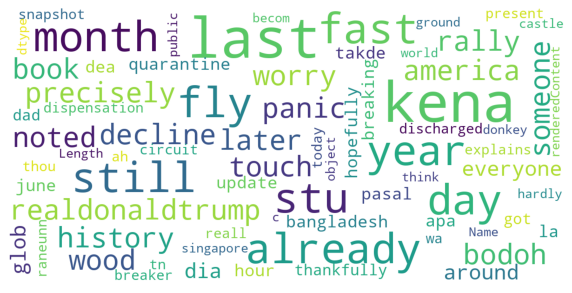

In [8]:
show_wordcloud(df["renderedContent"])

In [5]:
import gensim
from gensim.utils import simple_preprocess

def sent_to_words(sentences):
    for sentence in sentences:
        yield(gensim.utils.simple_preprocess(str(sentence), deacc=True))  # deacc=True removes punctuations

In [6]:
data = df['renderedContent'].values.tolist()
data_words = list(sent_to_words(data))
print(data_words[:1][0][:30])

['suspected', 'omicron', 'case', 'taken', 'ncid', 'home', 'recovery', 'allowed']


## Building Bi-gram and Tri-gram Models

In [7]:
# Build the bigram and trigram models
bigram = gensim.models.Phrases(data_words, min_count=5, threshold=100) # higher threshold fewer phrases.
trigram = gensim.models.Phrases(bigram[data_words], threshold=100)  

# Faster way to get a sentence clubbed as a trigram/bigram
bigram_mod = gensim.models.phrases.Phraser(bigram)
trigram_mod = gensim.models.phrases.Phraser(trigram)

In [8]:
def make_bigrams(texts):
    return [bigram_mod[doc] for doc in texts]

def make_trigrams(texts):
    return [trigram_mod[bigram_mod[doc]] for doc in texts]

In [13]:
data_words_bigrams = make_bigrams(data_words)
data_words_bigrams

[['already',
  'last',
  'month',
  'year',
  'day',
  'fly',
  'fast',
  'still',
  'stuck',
  'restriction',
  'want',
  'go',
  'back',
  'home'],
 ['realdonaldtrump', 'rally', 'noted', 'history', 'book', 'worry'],
 ['later', 'touch', 'wood', 'someone', 'kena', 'panic', 'bodoh'],
 ['precisely',
  'america',
  'decline',
  'everyone',
  'around',
  'globe',
  'see',
  'except',
  'american',
  'revealed',
  'exceptional',
  'worst',
  'possible',
  'way',
  'cain',
  'defends',
  'wearing_mask',
  'via',
  'mediaite'],
 ['dia', 'kena', 'quarantine', 'pasal', 'hopefully', 'takde', 'apa', 'la'],
 ['tip', 'bezos', 'may', 'turn', 'growth', 'opportunity', 'company'],
 ['might',
  'single',
  'largest',
  'goal',
  'post',
  'move',
  'ever',
  'seen',
  'epsilontheory',
  'year',
  'guy',
  'screaming',
  'ponzi',
  'fraud',
  'saying',
  'sooo',
  'good',
  'illegal'],
 ['cab', 'driver', 'prolly', 'think'],
 ['bantg', 'cure', 'thx', 'cheer'],
 ['seen',
  'single',
  'news',
  'social_med

In [9]:
data_words_trigrams = make_trigrams(data_words)
data_words_trigrams

[['suspected',
  'omicron',
  'case',
  'taken',
  'ncid',
  'home',
  'recovery',
  'allowed'],
 ['singapore',
  'report',
  'new',
  'case',
  'death',
  'icu',
  'utilisation',
  'rate',
  'rise'],
 ['scapegoat',
  'century',
  'raeesah',
  'khan',
  'directed',
  'opaque',
  'political',
  'party',
  'world',
  'worker',
  'party',
  'lied',
  'time',
  'end',
  'pressured',
  'pap',
  'investigation',
  'pap',
  'resource',
  'could',
  'better',
  'use',
  'crisis',
  'give',
  'thunderous',
  'applause',
  'pls'],
 ['math',
  'person',
  'think',
  'ability',
  'pull',
  'student',
  'rally',
  'student',
  'math',
  'primary',
  'secondary',
  'unite',
  'present',
  'coherent',
  'mathematical',
  'view',
  'along',
  'side',
  'govt',
  'explanation',
  'able',
  'put',
  'together',
  'newsletter'],
 ['sept', 'terrorist', 'attack', 'happening', 'time'],
 ['vishnundtv',
  'thanks',
  'reporting',
  'including',
  'video',
  'airport',
  'day',
  'unfortunately',
  'troubling'

## Building rough LDA model 

In [10]:
import gensim.corpora as corpora

# Create Dictionary
id2word = corpora.Dictionary(data_words_trigrams)

# Create Corpus
texts = data_words_trigrams

# Term Document Frequency
corpus = [id2word.doc2bow(text) for text in texts]

# View
print(corpus[:1][0][:30])

[(0, 1), (1, 1), (2, 1), (3, 1), (4, 1), (5, 1), (6, 1), (7, 1)]


In [16]:
# Build LDA model
lda_model = gensim.models.LdaMulticore(corpus=corpus,
                                       id2word=id2word,
                                       num_topics=5, 
                                       random_state=100,
                                       chunksize=100,
                                       passes=10,
                                       per_word_topics=True)

In [17]:
from pprint import pprint

# Print the Keyword in the 10 topics
pprint(lda_model.print_topics())
doc_lda = lda_model[corpus]

[(0,
  '0.009*"vaccine" + 0.006*"world" + 0.006*"like" + 0.005*"singapore" + '
  '0.005*"people" + 0.005*"china" + 0.005*"pandemic" + 0.004*"first" + '
  '0.004*"think" + 0.004*"day"'),
 (1,
  '0.017*"singapore" + 0.012*"people" + 0.007*"day" + 0.006*"case" + '
  '0.005*"death" + 0.004*"amp" + 0.004*"world" + 0.004*"new" + 0.004*"make" + '
  '0.004*"one"'),
 (2,
  '0.007*"year" + 0.006*"time" + 0.005*"singapore" + 0.005*"give" + '
  '0.004*"want" + 0.004*"still" + 0.004*"going" + 0.004*"amp" + 0.004*"many" + '
  '0.004*"people"'),
 (3,
  '0.007*"amp" + 0.005*"pandemic" + 0.005*"get" + 0.005*"time" + 0.005*"like" '
  '+ 0.004*"health" + 0.004*"great" + 0.004*"year" + 0.004*"back" + '
  '0.003*"thing"'),
 (4,
  '0.021*"singapore" + 0.010*"case" + 0.008*"time" + 0.007*"home" + '
  '0.006*"day" + 0.006*"new" + 0.005*"test" + 0.005*"virus" + 0.004*"today" + '
  '0.004*"one"')]


In [18]:
from gensim.models import CoherenceModel

# Compute Coherence Score
coherence_model_lda = CoherenceModel(model=lda_model, texts=data_words_trigrams, dictionary=id2word, 
                                     coherence='c_v')

coherence_lda = coherence_model_lda.get_coherence()
print('Coherence Score: ', coherence_lda)

Coherence Score:  0.23618569736280787


## Tuning based on number of topics

In [19]:
# supporting function
def compute_coherence_values(corpus, dictionary, k):
       
    # Build LDA model
    lda_model = gensim.models.LdaMulticore(corpus=corpus,
                                           id2word=dictionary,
                                           num_topics=k, 
                                           random_state=100,
                                           chunksize=100,
                                           passes=10,
                                           per_word_topics=True)
    
    # Coherence Score
    coherence_model_lda = CoherenceModel(model=lda_model, texts=data_words_trigrams, dictionary=id2word, 
                                         coherence='c_v')
    
    return coherence_model_lda.get_coherence()

In [20]:
# Can take a long time to run. In this case we are going to k_max=14.
import datetime
print(datetime.datetime.now())

from gensim.models import CoherenceModel

coherence_scores = []
model_topics = []

for k in range(2, 20):
    cv = compute_coherence_values(corpus=corpus, dictionary=id2word,k=k) 
    model_topics.append(k)    
    coherence_scores.append(cv)    
    print("#Topics: " + str(k) + ", Score: " + str(coherence_scores[-1]))

print(datetime.datetime.now())

2023-03-12 00:47:52.564813
#Topics: 2, Score: 0.21622018604926055
#Topics: 3, Score: 0.27652764757420417
#Topics: 4, Score: 0.30806940357964907
#Topics: 5, Score: 0.23976395701904996
#Topics: 6, Score: 0.36967230549992885
#Topics: 7, Score: 0.3385507487912542
#Topics: 8, Score: 0.3023707108120348
#Topics: 9, Score: 0.37222987709093336
#Topics: 10, Score: 0.4534869681508805
#Topics: 11, Score: 0.3833826101347427
#Topics: 12, Score: 0.4540085358535797
#Topics: 13, Score: 0.4316421683438939
#Topics: 14, Score: 0.37410503248069554
#Topics: 15, Score: 0.401276871620107
#Topics: 16, Score: 0.448125643964277
#Topics: 17, Score: 0.40507423953049093
#Topics: 18, Score: 0.44350331092138084
#Topics: 19, Score: 0.44596962704804327
2023-03-12 00:49:35.709870


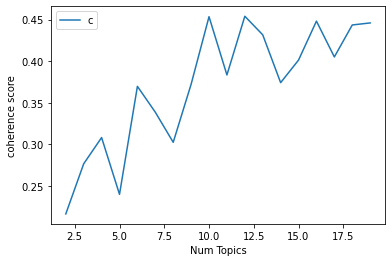

In [21]:
# Show graph

import matplotlib.pyplot as plt

limit=20; start=2; step=1;
x = range(start, limit, step)
plt.plot(x, coherence_scores)
plt.xlabel("Num Topics")
plt.ylabel("coherence score")
plt.legend(("coherence score"), loc='best')
plt.show()

In [22]:
end here

SyntaxError: invalid syntax (<ipython-input-22-9bcc9ab561c7>, line 1)

### Final Model

In [11]:
num_topics = 10

lda_model = gensim.models.LdaMulticore(corpus=corpus,
                                           id2word=id2word,
                                           num_topics=num_topics, 
                                           random_state=100,
                                           chunksize=100,
                                           passes=10)

In [12]:
# Save the LDA model

from gensim.test.utils import datapath

lda_model_saved_file = datapath("sg_phases_lda_model_10")
lda_model.save(lda_model_saved_file)

In [25]:
score = CoherenceModel(model=lda_model, texts=data_words_trigrams, dictionary=id2word, coherence='c_v')
score.get_coherence()

0.39628405026515445

In [26]:
import pyLDAvis.gensim_models as gensimvis
import pickle 
import pyLDAvis
import os

# Visualize the topics
pyLDAvis.enable_notebook()

LDAvis_data_filepath = os.path.join('./lda_model/sg_phases_lda_vis_tuned_'+str(num_topics))

# # this is a bit time consuming - make the if statement True
# # if you want to execute visualization prep yourself
if 1 == 1:
    LDAvis_prepared = gensimvis.prepare(lda_model, corpus, id2word)
    with open(LDAvis_data_filepath, 'wb') as f:
        pickle.dump(LDAvis_prepared, f)

# load the pre-prepared pyLDAvis data from disk
with open(LDAvis_data_filepath, 'rb') as f:
    LDAvis_prepared = pickle.load(f)

pyLDAvis.save_html(LDAvis_prepared, './lda_vis/sg_phases_lda_vis_tuned_'+ str(num_topics) +'.html')

LDAvis_prepared

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
1      0.170873  0.033247       1        1  14.389635
9      0.061024  0.062320       2        1  12.526513
6     -0.065976 -0.003428       3        1  11.948879
2     -0.066393  0.092150       4        1   9.937268
4      0.042920  0.027448       5        1   9.885426
8      0.009717  0.030901       6        1   9.878607
7     -0.085883  0.044390       7        1   9.703628
0      0.052363 -0.175758       8        1   8.720008
5     -0.078364 -0.090936       9        1   6.919195
3     -0.040281 -0.020336      10        1   6.090840, topic_info=          Term        Freq       Total Category  logprob  loglift
133  singapore  212.000000  212.000000  Default  30.0000  30.0000
285    vaccine   65.000000   65.000000  Default  29.0000  29.0000
445     travel   30.000000   30.000000  Default  28.0000  28.0000
216        get   72.000000   72.000000  Default  27.0000  27.0000
491        say   54.000000   54.000000  Default  26.0000  26.0000
..         ...         ...         ...      ...      ...      ...
491        say    5.509211   54.222627  Topic10  -5.4950   0.5117
5           go    5.345843   63.819508  Topic10  -5.5251   0.3186
133  singapore    5.631710  212.658447  Topic10  -5.4730  -0.8329
216        get    4.793517   72.669600  Topic10  -5.6341   0.0797
317       work    4.375072   43.032365  Topic10  -5.7255   0.5124

[682 rows x 6 columns], token_table=      Topic      Freq           Term
term                                
2091      3  0.104015      according
2091      8  0.832117      according
4619      1  0.763932       activity
4619      3  0.127322       activity
2092      3  0.923434       addition
...     ...       ...            ...
1838      1  0.950227           york
4316      5  0.722647          young
6608      3  0.816145  zenjournalist
1505      7  0.749517           zero
1505      9  0.149903           zero

[1429 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[2, 10, 7, 3, 5, 9, 8, 1, 6, 4])

**Added Sentiment Analysis**

In [13]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer
sid = SentimentIntensityAnalyzer()

In [14]:
def determine_sentiment(score):
    if score < 0:
        return "Negative"
    elif score > 0:
        return "Positive"
    else:
        return "Neutral"

In [15]:
sentiment_scores = df['rawContent'].apply(sid.polarity_scores)
sentiment_scores

0       {'neg': 0.213, 'neu': 0.787, 'pos': 0.0, 'comp...
1       {'neg': 0.328, 'neu': 0.672, 'pos': 0.0, 'comp...
2       {'neg': 0.271, 'neu': 0.432, 'pos': 0.297, 'co...
3       {'neg': 0.0, 'neu': 0.909, 'pos': 0.091, 'comp...
4       {'neg': 0.722, 'neu': 0.278, 'pos': 0.0, 'comp...
                              ...                        
4902    {'neg': 0.415, 'neu': 0.585, 'pos': 0.0, 'comp...
4903    {'neg': 0.0, 'neu': 0.513, 'pos': 0.487, 'comp...
4904    {'neg': 0.0, 'neu': 0.674, 'pos': 0.326, 'comp...
4905    {'neg': 0.114, 'neu': 0.886, 'pos': 0.0, 'comp...
4906    {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...
Name: rawContent, Length: 4907, dtype: object

In [16]:
# Load the saved model

from gensim.test.utils import datapath
lda_model_saved_file = datapath("sg_phases_lda_model_10")
lda_model = gensim.models.ldamodel.LdaModel.load(lda_model_saved_file)

In [17]:
topics, num_topics = [], 10

for i in range(len(corpus)):
    top_topics = (
        lda_model.get_document_topics(corpus[i],
                                      minimum_probability=0.0))
    topic_vec = [top_topics[i][1] for i in range(num_topics)]
    topics.append(topic_vec.index(max(topic_vec))+1)
    
topics

[9,
 10,
 3,
 10,
 3,
 5,
 8,
 1,
 2,
 1,
 1,
 1,
 10,
 5,
 4,
 1,
 10,
 8,
 6,
 4,
 10,
 6,
 7,
 4,
 5,
 5,
 4,
 9,
 3,
 7,
 5,
 2,
 9,
 5,
 5,
 8,
 10,
 10,
 8,
 4,
 5,
 7,
 8,
 10,
 7,
 7,
 7,
 8,
 10,
 2,
 5,
 7,
 9,
 3,
 8,
 2,
 3,
 8,
 10,
 4,
 1,
 10,
 1,
 7,
 10,
 10,
 5,
 7,
 4,
 10,
 6,
 4,
 4,
 2,
 10,
 3,
 1,
 4,
 4,
 9,
 2,
 1,
 4,
 3,
 6,
 6,
 8,
 1,
 1,
 8,
 7,
 7,
 2,
 3,
 7,
 5,
 8,
 10,
 9,
 5,
 8,
 9,
 3,
 1,
 2,
 4,
 9,
 4,
 8,
 4,
 10,
 2,
 2,
 10,
 8,
 8,
 7,
 10,
 1,
 6,
 5,
 1,
 5,
 3,
 7,
 7,
 7,
 10,
 3,
 7,
 1,
 10,
 6,
 6,
 5,
 2,
 2,
 6,
 10,
 6,
 10,
 8,
 8,
 4,
 6,
 5,
 2,
 8,
 10,
 10,
 9,
 2,
 6,
 5,
 10,
 2,
 2,
 8,
 5,
 4,
 10,
 4,
 5,
 9,
 1,
 2,
 5,
 4,
 2,
 10,
 3,
 5,
 5,
 8,
 10,
 10,
 3,
 4,
 2,
 10,
 8,
 1,
 5,
 9,
 8,
 5,
 9,
 1,
 8,
 1,
 2,
 3,
 5,
 1,
 7,
 5,
 3,
 8,
 7,
 6,
 10,
 4,
 2,
 5,
 10,
 4,
 5,
 5,
 10,
 1,
 10,
 1,
 8,
 1,
 8,
 4,
 1,
 6,
 9,
 10,
 10,
 8,
 10,
 10,
 2,
 10,
 8,
 5,
 1,
 9,
 4,
 5,
 7,
 7,
 3,
 7,
 1,
 1,
 10,
 10

In [18]:
df["Topic"] = topics
df.head()

,url,date,rawContent,renderedContent,id,user,replyCount,retweetCount,likeCount,quoteCount,...,inReplyToUser,mentionedUsers,coordinates,place,hashtags,cashtags,card,viewCount,vibe,Topic
0,https://twitter.com/_rodahidup/status/14658121...,2021-11-30 22:37:02+00:00,suspected omicron case taken ncid home recover...,suspected omicron case taken ncid home recover...,1465812140439203842,https://twitter.com/_rodahidup,0,0,0,0,...,NaN,NaN,"Coordinates(longitude=103.749959507073, latitu...","Place(id='58a4c3a0d54e1400', fullName='Central...",NaN,NaN,SummaryCard(title='Suspected Omicron Covid-19 ...,NaN,NaN,9
1,https://twitter.com/_rodahidup/status/14657109...,2021-11-30 15:54:52+00:00,singapore report new case death icu utilisatio...,singapore report new case death icu utilisatio...,1465710933246820367,https://twitter.com/_rodahidup,0,0,0,0,...,NaN,NaN,"Coordinates(longitude=103.749959507073, latitu...","Place(id='58a4c3a0d54e1400', fullName='Central...",NaN,NaN,"SummaryCard(title='Singapore reports 1,239 new...",NaN,NaN,10
2,https://twitter.com/temptempholder/status/1465...,2021-11-30 15:48:16+00:00,scapegoat century raeesah khan directed opaque...,scapegoat century raeesah khan directed opaque...,1465709269370556419,https://twitter.com/temptempholder,0,1,3,0,...,NaN,NaN,"Coordinates(longitude=103.749959507073, latitu...","Place(id='58a4c3a0d54e1400', fullName='Central...",NaN,NaN,NaN,NaN,NaN,3
3,https://twitter.com/temptempholder/status/1465...,2021-11-30 12:43:53+00:00,math person think ability pull student rally s...,math person think ability pull student rally s...,1465662868578136074,https://twitter.com/temptempholder,0,0,0,0,...,NaN,NaN,"Coordinates(longitude=103.817832999913, latitu...","Place(id='5f1f473ed6455f55', fullName='North-E...",NaN,NaN,NaN,NaN,NaN,10
4,https://twitter.com/temptempholder/status/1465...,2021-11-30 12:24:35+00:00,sept terrorist attack happening time,sept terrorist attack happening time,1465658013058928649,https://twitter.com/temptempholder,0,0,0,0,...,NaN,NaN,"Coordinates(longitude=103.817832999913, latitu...","Place(id='5f1f473ed6455f55', fullName='North-E...",NaN,NaN,NaN,NaN,NaN,3


In [19]:
sentiments = sentiment_scores.apply(lambda x: x["compound"])
sentiment_label = sentiments.apply(determine_sentiment)
df["Sentiment"] = sentiment_label
df.head()

,url,date,rawContent,renderedContent,id,user,replyCount,retweetCount,likeCount,quoteCount,...,mentionedUsers,coordinates,place,hashtags,cashtags,card,viewCount,vibe,Topic,Sentiment
0,https://twitter.com/_rodahidup/status/14658121...,2021-11-30 22:37:02+00:00,suspected omicron case taken ncid home recover...,suspected omicron case taken ncid home recover...,1465812140439203842,https://twitter.com/_rodahidup,0,0,0,0,...,NaN,"Coordinates(longitude=103.749959507073, latitu...","Place(id='58a4c3a0d54e1400', fullName='Central...",NaN,NaN,SummaryCard(title='Suspected Omicron Covid-19 ...,NaN,NaN,9,Negative
1,https://twitter.com/_rodahidup/status/14657109...,2021-11-30 15:54:52+00:00,singapore report new case death icu utilisatio...,singapore report new case death icu utilisatio...,1465710933246820367,https://twitter.com/_rodahidup,0,0,0,0,...,NaN,"Coordinates(longitude=103.749959507073, latitu...","Place(id='58a4c3a0d54e1400', fullName='Central...",NaN,NaN,"SummaryCard(title='Singapore reports 1,239 new...",NaN,NaN,10,Negative
2,https://twitter.com/temptempholder/status/1465...,2021-11-30 15:48:16+00:00,scapegoat century raeesah khan directed opaque...,scapegoat century raeesah khan directed opaque...,1465709269370556419,https://twitter.com/temptempholder,0,1,3,0,...,NaN,"Coordinates(longitude=103.749959507073, latitu...","Place(id='58a4c3a0d54e1400', fullName='Central...",NaN,NaN,NaN,NaN,NaN,3,Positive
3,https://twitter.com/temptempholder/status/1465...,2021-11-30 12:43:53+00:00,math person think ability pull student rally s...,math person think ability pull student rally s...,1465662868578136074,https://twitter.com/temptempholder,0,0,0,0,...,NaN,"Coordinates(longitude=103.817832999913, latitu...","Place(id='5f1f473ed6455f55', fullName='North-E...",NaN,NaN,NaN,NaN,NaN,10,Positive
4,https://twitter.com/temptempholder/status/1465...,2021-11-30 12:24:35+00:00,sept terrorist attack happening time,sept terrorist attack happening time,1465658013058928649,https://twitter.com/temptempholder,0,0,0,0,...,NaN,"Coordinates(longitude=103.817832999913, latitu...","Place(id='5f1f473ed6455f55', fullName='North-E...",NaN,NaN,NaN,NaN,NaN,3,Negative


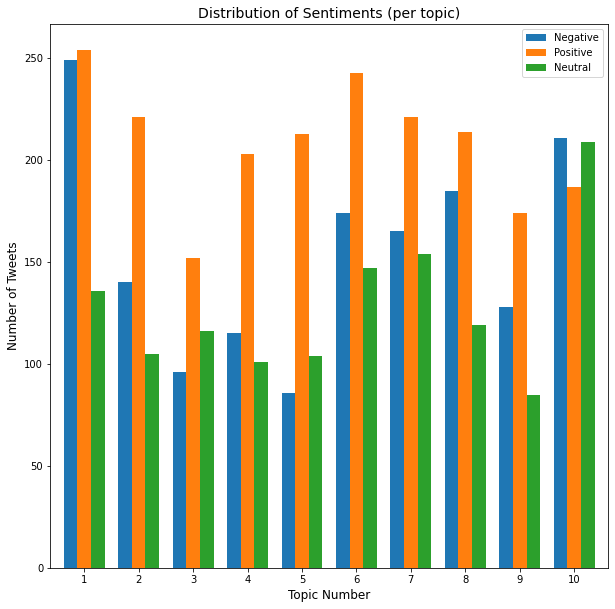

In [20]:
import matplotlib.pyplot as plt

topics = range(1, num_topics+1)
columns = ["Negative", "Positive", "Neutral"]
data = []

for i in range(num_topics):
    curr_topic = df[df["Topic"] == i+1]
    negative, positive, neutral = len(curr_topic[curr_topic["Sentiment"] == "Negative"]), len(curr_topic[curr_topic["Sentiment"] == "Positive"]), len(curr_topic[curr_topic["Sentiment"] == "Neutral"]) 
    data.append([negative, positive, neutral])

topic_sentiment_df = pd.DataFrame(data, columns=columns, index=topics)
topic_sentiment_df.plot(kind="bar", figsize=(10, 10), width=0.75)
plt.title("Distribution of Sentiments (per topic)", fontsize=14)
plt.xlabel("Topic Number", fontsize=12)
plt.ylabel("Number of Tweets", fontsize=12)
plt.gca().xaxis.set_tick_params(rotation=0)
plt.show()